### Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Inspection

In [ ]:
train_data = pd.read_csv("Training_Cleaned.csv")
test_data = pd.read_csv("Testing_Cleaned.csv")

print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)
print("\nColumns:", train_data.columns.tolist())

display(train_data.head())

Training Data Shape: (263, 133)
Testing Data Shape: (42, 133)

Columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion'

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


### Feature and Target Split

In [ ]:
X_train = train_data.drop(columns=["prognosis"])
y_train = train_data["prognosis"]

X_test = test_data.drop(columns=["prognosis"])
y_test = test_data["prognosis"]

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

### Base Logistic Regression Model


=== Base Model Results ===
Accuracy : 0.9761904761904762
Precision: 0.9880952380952381
Recall   : 0.9761904761904762
F1 Score : 0.9761904761904762


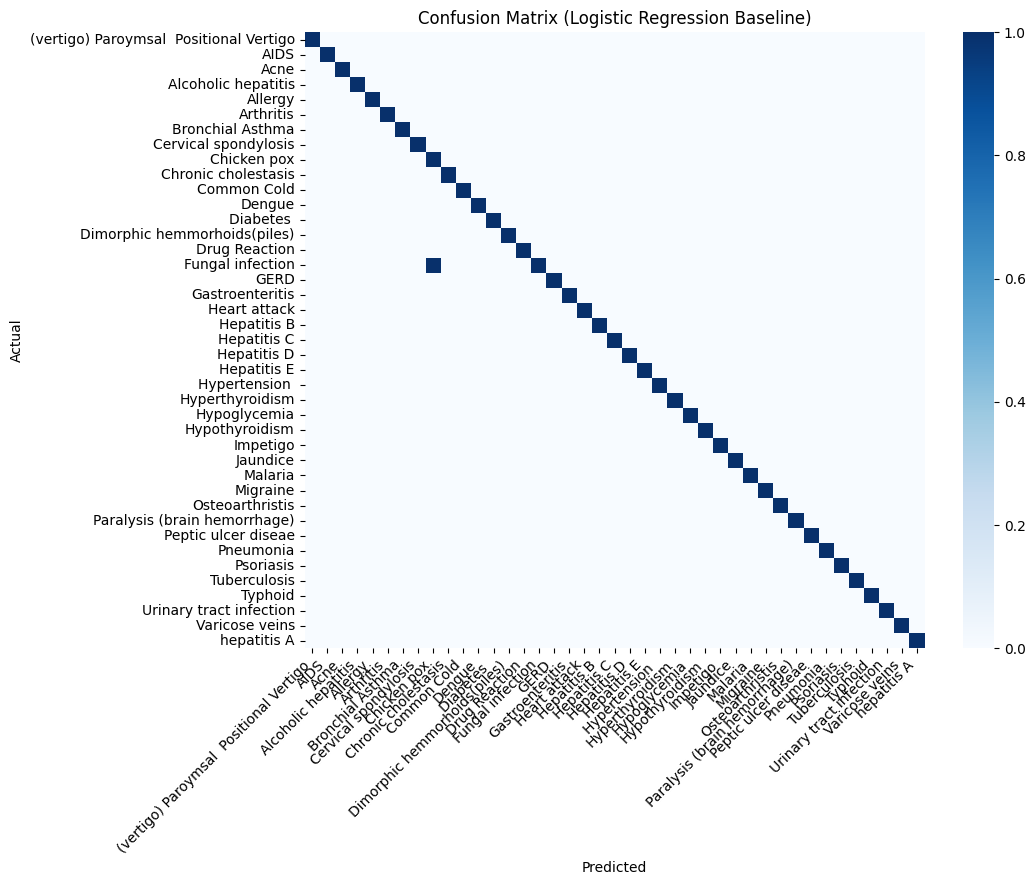

In [ ]:
base_lr = LogisticRegression(max_iter=1000, solver='liblinear')
base_lr.fit(X_train, y_train_enc)

# Predictions
y_pred_base = base_lr.predict(X_test)

# Evaluation
print("\n=== Base Model Results ===")
print("Accuracy :", accuracy_score(y_test_enc, y_pred_base))
print("Precision:", precision_score(y_test_enc, y_pred_base, average='weighted'))
print("Recall   :", recall_score(y_test_enc, y_pred_base, average='weighted'))
print("F1 Score :", f1_score(y_test_enc, y_pred_base, average='weighted'))

# Confusion matrix plotting
cm = confusion_matrix(y_test_enc, y_pred_base)
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', annot=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Logistic Regression Baseline)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Cross Validation

In [ ]:
lr_cv = LogisticRegression(max_iter=1000, solver='liblinear')

# 5-fold cross-validation (accuracy only)
cv_scores = cross_val_score(lr_cv, X_train, y_train_enc, cv=5, scoring='accuracy')

# Display results
print("\nCross-validation scores per fold:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-validation scores per fold: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


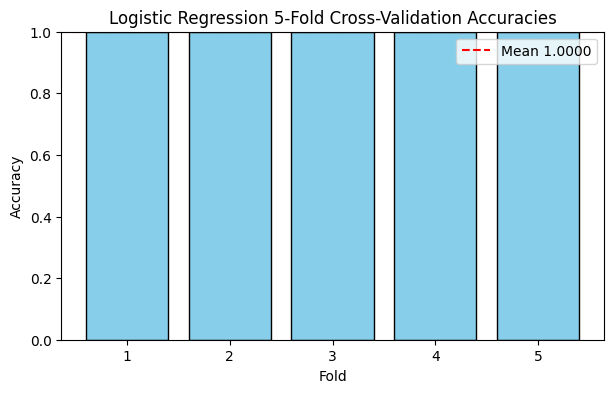

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(range(1, len(cv_scores)+1), cv_scores, color='skyblue', edgecolor='black')
plt.axhline(cv_scores.mean(), color='r', linestyle='--', label=f'Mean {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression 5-Fold Cross-Validation Accuracies')
plt.xticks(range(1, len(cv_scores)+1))
plt.ylim(0, 1)  # optional, ensures consistent y-axis scale
plt.legend()
plt.show()

### Hyperparameter Tuning using GridSearchCV

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


### Tuned Model Evaluation


=== Tuned Model Results ===
Accuracy : 0.9761904761904762
Precision: 0.9880952380952381
Recall   : 0.9761904761904762
F1 Score : 0.9761904761904762


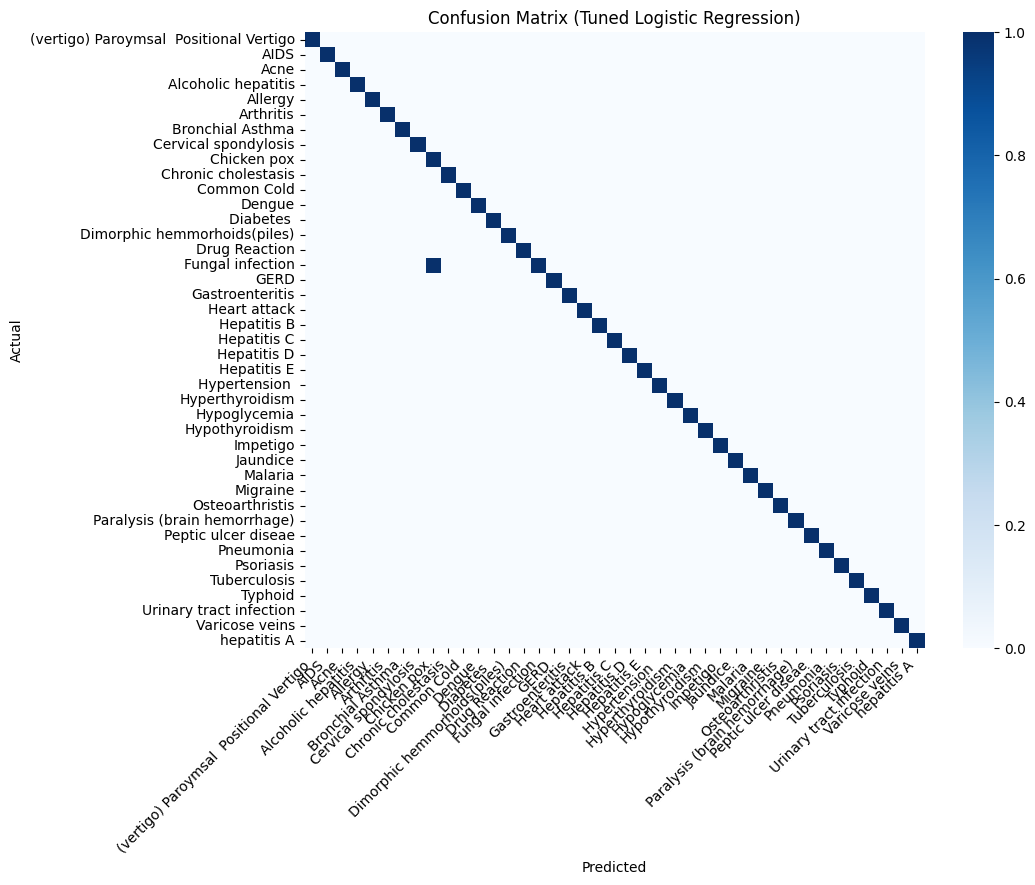

In [ ]:
tuned_lr.fit(X_train, y_train_enc)  #

# Predict
y_pred_tuned_enc = tuned_lr.predict(X_test)

# Evaluation metrics
print("\n=== Tuned Model Results ===")
print("Accuracy :", accuracy_score(y_test_enc, y_pred_tuned_enc))
print("Precision:", precision_score(y_test_enc, y_pred_tuned_enc, average='weighted'))
print("Recall   :", recall_score(y_test_enc, y_pred_tuned_enc, average='weighted'))
print("F1 Score :", f1_score(y_test_enc, y_pred_tuned_enc, average='weighted'))

# Confusion matrix plotting
cm_tuned = confusion_matrix(y_test_enc, y_pred_tuned_enc)
plt.figure(figsize=(10,8))
sns.heatmap(cm_tuned, cmap='Blues', annot=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Tuned Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
